In [230]:
# import 하기
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt 
# Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns # Seaborn(씨본) 패키지 임포트
import matplotlib as mpl
import matplotlib.font_manager as fm

# 워드클라우드 생성을 위한 패키지
from wordcloud import WordCloud
# 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용되는 패키지
from PIL import Image

In [231]:
# 그래프에 한글이 나오도록 설정하는 코드

mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname = path, size = 50).get_name()

plt.rc('font', family=font_name)

In [232]:
# 지역별 데이터 병합하기

# 전체 데이터 불러오기
local_csv_list = []

# enumerate : '열거하다', 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체 반환
for i, file in enumerate(['Busan.csv', 'Chungbuk.csv', 'Chungnam.csv','Daegu.csv','Daejeon.csv','Gangwon.csv','Gwangju.csv','Gyeonggi.csv','Gyeongsangbuk.csv','Gyeongsangnam.csv','Incheon.csv','Jeju.csv','Jeollabuk.csv','Jeonllanam.csv','Sejong.csv','Seoul.csv','Ulsan.csv']):
    # i엔 인덱스를, file엔 csv 파일을 입력받게 됨
    local_file = pd.read_csv(r'C:\Users\GJ\Desktop\wordcloud\DataPreprocessing_csv\{}'.format(file))
    # file 포맷팅을 통해 csv 파일 불러오기

    local_csv_list.append(local_file)
    # 리스트 local_csv_list에 추가하기

In [233]:
local_file_con = pd.concat(local_csv_list)
local_file_con.head()

# 필요없는 칼럼 삭제하기
local_file_con.drop('Unnamed: 0', axis=1, inplace=True)
local_file_con.drop('주소_구,군', axis=1, inplace=True)
local_file_con

,업종,업소명,주요품목,가격,연락처,주소,카카오별점,네이버별점,위도,경도
0,세탁업,대저기계세탁소,정장한벌,8000원,051-973-5434,부산광역시 강서구 대저로 279 (대저1동),별점없음,별점없음,35.21257237,128.982663
1,한식_일반,배부른밥집,정식,6000원,051-338-3222,부산광역시 북구 의성로112번길62,별점없음,별점없음,35.21112296,129.014363
2,한식_면류,시골칼국수,칼국수,5000원,051-000-0000,부산광역시 북구 금곡대로185-10 1층 4호,4.5,4.51,35.22572234,129.009545
3,한식_분식,깡통골목할매 유부전골 본점,유부전골,6000원,512471878,부산광역시 부산 중구 부평3길 29 (부평동1가),3.0,4.31,35.10203753,129.027061
4,한식_일반,두래박,수제돈가스,9000원,051-611-3651,부산광역시 남구 부산광역시 남구 유엔평화로 133(용당동),5.0,별점없음,35.12432167,129.096548
...,...,...,...,...,...,...,...,...,...,...
112,이미용업,선경이용원,컷트,5000원,052-246-1703,울산광역시 중구 유곡로 10(우정동),별점없음,별점없음,35.558237,129.308455
113,이미용업,현대이용원,커트,10000원,052-260-6123,울산광역시 남구 돋질로251번길 38,별점없음,별점없음,35.546786,129.331298
114,이미용업,경주이용원,컷트,12000원,010-4907-9990,울산광역시 남구 월평로159번길 4,별점없음,별점없음,35.545149,129.322629
115,중식,중화루,자장면,6000원,052-224-0392,울산광역시 남구 삼호로11번길 32,별점없음,4.39,35.55117,129.268275


##### 네이버 별점과 카카오 별점이 모두 4.0 이상인 업소명의 별점 평균을 구하여 업소명 시각화_워드클라우드

In [234]:
# 네이버와 카카오 별점 중 '별점없음'을 0으로 바꿔주기
local_file_con['네이버별점'].astype('str')
local_file_con['네이버별점'] = local_file_con['네이버별점'].replace('별점없음', '0')
local_file_con['네이버별점'] = local_file_con['네이버별점'].astype('float')


In [235]:

local_file_con['카카오별점'].astype('str')
local_file_con['카카오별점'] = local_file_con['카카오별점'].replace('별점없음', '0')
local_file_con['카카오별점'] = local_file_con['카카오별점'].astype('float')

In [236]:
# 카카오와 네이버 별점이 모두 float형태로 변환된 것을 알 수 있음
local_file_con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7083 entries, 0 to 116
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업종      7082 non-null   object 
 1   업소명     7083 non-null   object 
 2   주요품목    7083 non-null   object 
 3   가격      7083 non-null   object 
 4   연락처     7081 non-null   object 
 5   주소      7060 non-null   object 
 6   카카오별점   7074 non-null   float64
 7   네이버별점   7083 non-null   float64
 8   위도      7083 non-null   object 
 9   경도      7083 non-null   float64
dtypes: float64(3), object(7)
memory usage: 608.7+ KB


In [237]:
# 네이버 별점과 카카오 별점 모두 4.0 이상인 업소 찾기
all_score = local_file_con[(local_file_con['네이버별점']>=4.0) & (local_file_con['카카오별점']>=4.0)]

In [238]:
all_score_avg = (all_score['네이버별점'] + all_score['카카오별점'])/2
all_score['별점평균'] = all_score_avg

all_score.head()

C:\Users\GJ\AppData\Local\Temp\ipykernel_9896\1301580030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_score['별점평균'] = all_score_avg


,업종,업소명,주요품목,가격,연락처,주소,카카오별점,네이버별점,위도,경도,별점평균
2,한식_면류,시골칼국수,칼국수,5000원,051-000-0000,부산광역시 북구 금곡대로185-10 1층 4호,4.5,4.51,35.22572234,129.009545,4.505
11,한식_일반,영일삼계탕,한방삼계탕,13000원,051-507-6622,부산광역시 동래구 사직로 64 (사직동),5.0,4.55,35.19555683,129.058801,4.775
23,한식_일반,수향아구찜,생아구찜(소),35000원,051-722-5985,부산광역시 기장군 기장읍 대변로 134-10,4.1,4.33,35.22700792,129.226451,4.215
30,일식,킹콩초밥,모듬초밥 (12p),13000원,051-751-5036,부산광역시 수영구 구락로8-4(수영동),4.3,4.71,35.16890039,129.119714,4.505
33,한식_일반,두보완당,완당,7000원,051-752-6655,부산광역시 수영구 수영로679번길 26(광안3동),4.6,4.37,35.16673227,129.113592,4.485


In [239]:
all_score['별점평균'].info()

<class 'pandas.core.series.Series'>
Index: 2037 entries, 2 to 99
Series name: 별점평균
Non-Null Count  Dtype  
--------------  -----  
2037 non-null   float64
dtypes: float64(1)
memory usage: 31.8 KB


In [240]:
local_file_con['카카오별점'] = local_file_con['카카오별점'].replace('0', '별점없음')
local_file_con['네이버별점'] = local_file_con['네이버별점'].replace('0', '별점없음')

In [241]:
# 워드클라우드 생성하기

data = {
    'labels' : all_score['업소명'],
    'score' : all_score['별점평균']
}

In [242]:
word_df = pd.DataFrame(data)
word_df.sort_values('score',ascending=False)

,labels,score
98,피크닉메이트,4.995
162,제주사진공방,4.985
64,유별난숯불꼼장어,4.975
150,아트카페,4.950
13,도시락팜,4.950
...,...,...
112,생생맛정식,4.020
200,진성회관,4.020
176,첫마중 부잣집,4.015
509,용산풍천숯불민물장어,4.000


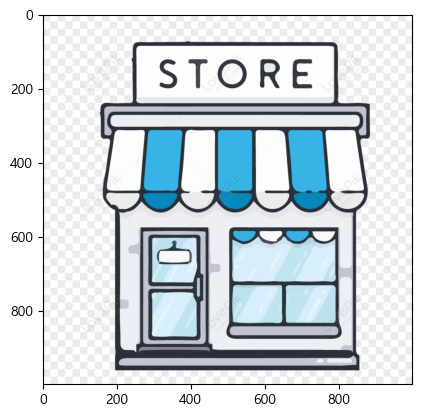

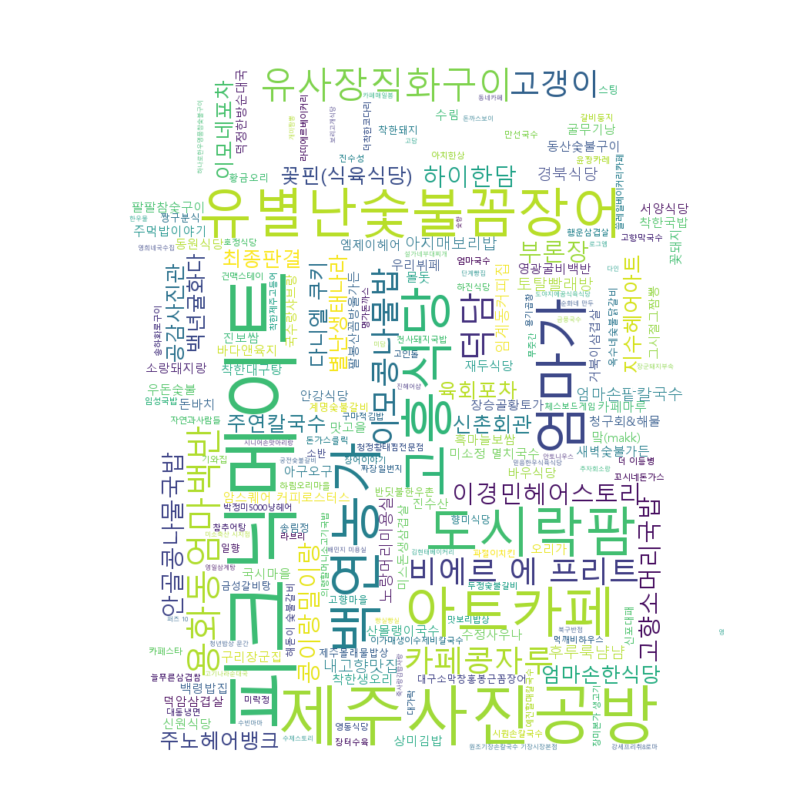

In [333]:
word_df_dict = word_df.set_index('labels').to_dict()['score']

img = Image.open(r'C:\Users\GJ\Desktop\wordcloud\store.png')
plt.imshow(img)

mask = Image.new('RGBA', img.size, (255,255,255) )
mask.paste(img, img)
mask = np.array(mask)

wordcloud_instance = WordCloud(font_path='malgun', width=300, height=300, max_font_size=100, background_color='white', mask=mask).generate_from_frequencies(word_df_dict)

plt.figure(figsize=(10, 10))

plt.axis('off')
plt.imshow(wordcloud_instance, interpolation='bilinear')
plt.show()

##### 음식분야별 가격 비교 _막대그래프

In [244]:
local_file_con.head()

,업종,업소명,주요품목,가격,연락처,주소,카카오별점,네이버별점,위도,경도
0,세탁업,대저기계세탁소,정장한벌,8000원,051-973-5434,부산광역시 강서구 대저로 279 (대저1동),0.0,0.00,35.21257237,128.982663
1,한식_일반,배부른밥집,정식,6000원,051-338-3222,부산광역시 북구 의성로112번길62,0.0,0.00,35.21112296,129.014363
2,한식_면류,시골칼국수,칼국수,5000원,051-000-0000,부산광역시 북구 금곡대로185-10 1층 4호,4.5,4.51,35.22572234,129.009545
3,한식_분식,깡통골목할매 유부전골 본점,유부전골,6000원,512471878,부산광역시 부산 중구 부평3길 29 (부평동1가),3.0,4.31,35.10203753,129.027061
4,한식_일반,두래박,수제돈가스,9000원,051-611-3651,부산광역시 남구 부산광역시 남구 유엔평화로 133(용당동),5.0,0.00,35.12432167,129.096548


In [245]:
local_file_con['업종'].unique()

array(['세탁업', '한식_일반', '한식_면류', '한식_분식', '중식', '기타서비스업', '기타양식', '이미용업',
       '한식_육류', '한식_기타', '일식', '한식_해산물', '한식_찌개류', '목욕업', '양식', '숙박업',
       '한식_한정식', nan], dtype=object)

In [246]:
local_file_con[local_file_con['업종'] == '한식_일반']

# 가격의 평균 구하기
price_han = local_file_con[local_file_con['업종'] == '한식_일반']['가격'].apply(lambda x:x.split('원')[0])

price_han_avg = round(price_han.astype('int').mean())

# 한식_일반 : 2797

In [247]:
local_file_con[local_file_con['업종'] == '한식_면류'].count()

# 한식_면류 : 2797

업종       576
업소명      576
주요품목     576
가격       576
연락처      576
주소       575
카카오별점    574
네이버별점    576
위도       576
경도       576
dtype: int64

In [248]:

# 한식_면류 가격의 평균 구하기
price_han2 = local_file_con[local_file_con['업종'] == '한식_면류']['가격'].apply(lambda x:x.split('원')[0])

price_han2_avg = round(price_han2.astype('int').mean())

In [249]:
local_file_con[local_file_con['업종'] == '한식_분식'].count()

# 한식_분식 : 61

# 한식_분식 가격의 평균 구하기
price_han3 = local_file_con[local_file_con['업종'] == '한식_분식']['가격'].apply(lambda x:x.split('원')[0])

price_han3_avg = round(price_han3.astype('int').mean())

In [250]:
local_file_con[local_file_con['업종'] == '중식'].count()
# 중식 : 426

업종       426
업소명      426
주요품목     426
가격       426
연락처      426
주소       425
카카오별점    426
네이버별점    426
위도       426
경도       426
dtype: int64

In [251]:
# 중식 가격의 평균 구하기
price_china = local_file_con[local_file_con['업종'] == '중식']['가격'].apply(lambda x:x.split('원')[0])

In [252]:
price_china_avg = round(price_china.astype('int').mean())
price_china_avg

5155

In [271]:
local_file_con[local_file_con['업종'] == '양식'].count()

# 양식 101

업종       101
업소명      101
주요품목     101
가격       101
연락처      101
주소       101
카카오별점    101
네이버별점    101
위도       101
경도       101
dtype: int64

In [272]:

# 양식 가격의 평균 구하기
price_foreign_main = local_file_con[local_file_con['업종'] == '양식']['가격'].apply(lambda x:x.split('원')[0])

price_foreign_main_avg = round(price_foreign_main.astype('int').mean())

In [253]:
local_file_con[local_file_con['업종'] == '기타양식'].count()

# 기타양식 : 274

업종       274
업소명      274
주요품목     274
가격       274
연락처      274
주소       274
카카오별점    274
네이버별점    274
위도       274
경도       274
dtype: int64

In [254]:

# 기타양식 가격의 평균 구하기
price_foreign = local_file_con[local_file_con['업종'] == '기타양식']['가격'].apply(lambda x:x.split('원')[0])

price_foreign_avg = round(price_foreign.astype('int').mean())

In [256]:
local_file_con[local_file_con['업종'] == '한식_육류'].count()

# 한식_육류 : 774

업종       774
업소명      774
주요품목     774
가격       774
연락처      774
주소       772
카카오별점    772
네이버별점    774
위도       774
경도       774
dtype: int64

In [259]:

# 한식_육류 가격의 평균 구하기
price_han4 = local_file_con[local_file_con['업종'] == '한식_육류']['가격'].apply(lambda x:x.split('원')[0])
price_han4

19     12000
46      5500
52      2500
57     58000
62      8000
       ...  
67      7000
88      5000
101     9000
106     7000
116    10000
Name: 가격, Length: 774, dtype: object

In [ ]:

price_han4_avg = round(price_han4.astype('int').mean())
price_han4_avg

In [260]:
local_file_con[local_file_con['업종'] == '한식_기타'].count()

# 한식_기타 : 117


업종       117
업소명      117
주요품목     117
가격       117
연락처      117
주소       117
카카오별점    117
네이버별점    117
위도       117
경도       117
dtype: int64

In [262]:

# 한식_분식 가격의 평균 구하기
price_han5 = local_file_con[local_file_con['업종'] == '한식_기타']['가격'].apply(lambda x:x.split('원')[0])

price_han5_avg = round(price_han5.astype('int').mean())
price_han5_avg

8920

In [265]:
# 일식 가격의 평균 구하기
local_file_con[local_file_con['업종'] == '일식'].count()

# 일식 : 80


# 일식 가격의 평균 구하기
price_japan = local_file_con[local_file_con['업종'] == '일식']['가격'].apply(lambda x:x.split('원')[0])

price_japan_avg = round(price_japan.astype('int').mean())
price_japan_avg

16022

In [267]:


# 한식_해산물 가격의 평균 구하기
local_file_con[local_file_con['업종'] == '한식_해산물'].count()

# 한식_해산물 : 9


업종       9
업소명      9
주요품목     9
가격       9
연락처      9
주소       9
카카오별점    9
네이버별점    9
위도       9
경도       9
dtype: int64

In [268]:
# 한식_해산물 가격의 평균 구하기
price_han6 = local_file_con[local_file_con['업종'] == '한식_해산물']['가격'].apply(lambda x:x.split('원')[0])

price_han6_avg = round(price_han6.astype('int').mean())
price_han6_avg

25778

In [309]:
# 한식_찌개류 가격의 평균 구하기
local_file_con[local_file_con['업종'] == '한식_찌개류'].count()

# 한식_찌개류: 44

업종       44
업소명      44
주요품목     44
가격       44
연락처      44
주소       44
카카오별점    44
네이버별점    44
위도       44
경도       44
dtype: int64

In [270]:
# 한식_찌개류 가격의 평균 구하기
price_han7 = local_file_con[local_file_con['업종'] == '한식_찌개류']['가격'].apply(lambda x:x.split('원')[0])

price_han7_avg = round(price_han7.astype('int').mean())
price_han7_avg

8841

In [274]:
# 한식_한정식 가격의 평균 구하기
local_file_con[local_file_con['업종'] == '한식_한정식'].count()

# 한식_한정식: 14

업종       14
업소명      14
주요품목     14
가격       14
연락처      14
주소       14
카카오별점    14
네이버별점    14
위도       14
경도       14
dtype: int64

In [273]:

# 한식_한정식 가격의 평균 구하기
price_han8 = local_file_con[local_file_con['업종'] == '한식_한정식']['가격'].apply(lambda x:x.split('원')[0])

price_han8_avg = round(price_han8.astype('int').mean())
price_han8_avg

9500

In [307]:
x_name = ['한식_일반', '한식_면류', '한식_분식', '중식', '기타양식', '한식_육류', '한식_기타', '일식', '한식_해산물', '한식_찌개류', '양식', '한식_한정식']

values = [price_han_avg,price_han2_avg,price_han3_avg,price_china_avg,price_foreign_avg,price_han4_avg,price_han5_avg, price_japan_avg,price_han6_avg,price_han7_avg,price_foreign_main_avg,price_han8_avg]

store_avg = [price_han,price_han2,price_han3,price_china,price_foreign,price_han4,price_han5, price_japan,price_han6,price_han7,price_foreign_main,price_han8]

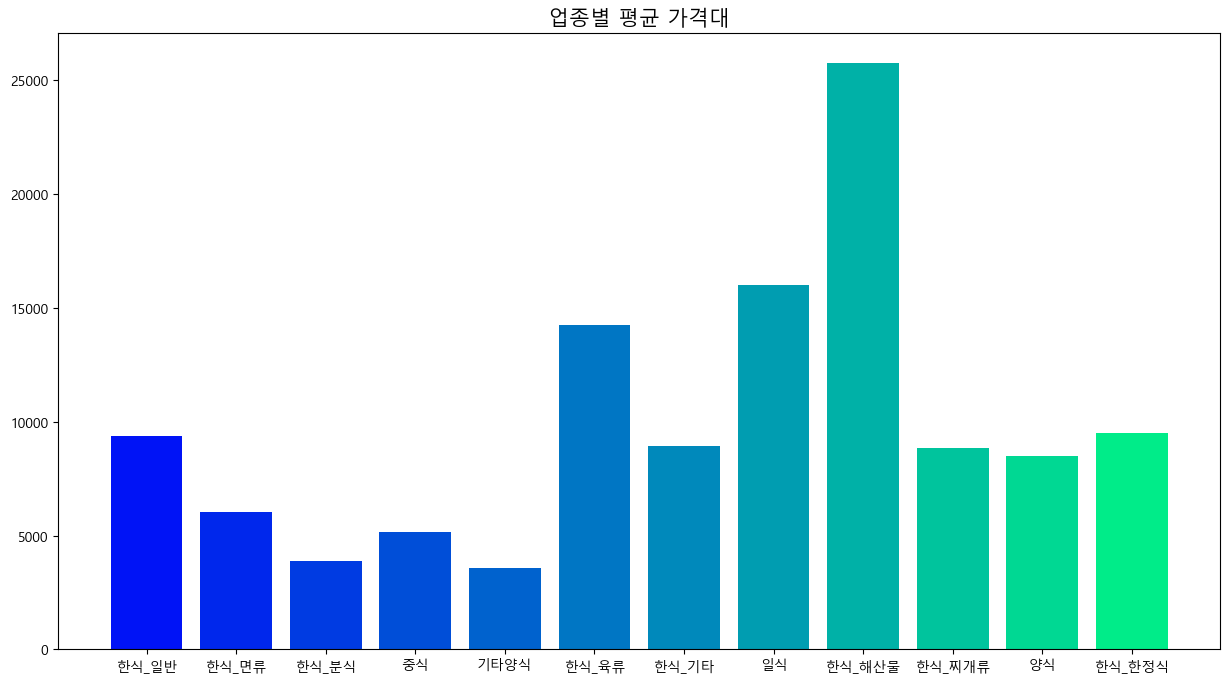

In [314]:
fig = plt.figure(figsize=(15,8)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

colors = sns.color_palette('winter', len(x_name)) ## 바 차트 색상

# x축 눈금 라벨이 표시될 x 좌표
xtick_label_position = list(range(len(x_name)))
# x축 눈금 라벨 출력
plt.xticks(xtick_label_position, x_name)

# 막대그래프 출력
plt.bar(xtick_label_position, values, color=colors)

plt.title('업종별 평균 가격대', fontsize=15)
plt.show()